#1. 순차 데이터와 순환 신경망


#순차 데이터(Sequential Data)
---
**순차 데이터**는 텍스트나 **시계열 데이터(Time Series Data)**와 같이 순서에 의미가 있는 데이터를 말한다. 일별 온도를 기록한 시계열 데이터에서 날짜 순서를 뒤죽박죽 섞는다면 내일의 온도를 예상하기 어렵다. 이전까지 보았던 데이터는 순서와는 상관이 없었고, 오히려 골고루 섞어 훈련 세트와 검증 세트로 나누는 것이 결과가 더 좋았다. 하지만 텍스트 데이터에서는 단어의 순서를 섞어서 주입하면 안된다.

완전 연결 신경망이나 합성곱 신경망은 기억 장치가 없다. 하나의 배치를 사용하여 정방향 계산을 수행하고 나면 그 샘플은 다음 샘플 처리시에 재사용되지 않는다. 이렇게 입력 데이터의 흐름이 앞으로만 전달되는 신경망을 **피드포워드 신경망(Feedforward Neural Network)**라고 한다. 신경망이 이전에 처리했던 샘플을 재사용하기 위해서는 데이터가 신경망 층에 순환될 필요가 있다. 이런 신경망을 **순환 신경망(Recurrent Neural Network)**라고 한다. 순환 신경망은 일반적인 완전 연결 신경망에 이전 데이터의 처리 흐름을 순환하는 고리 하나만 추가하면 된다. 샘플을 처리할 때 뉴런의 출력을 다시 사용하는데 이렇게 샘플을 처리하는 한 단계를 **타임스텝(Timestep)**이라고 한다. 순환 신경망에서는 특별히 층을 **셀(Cell)**이라고 부르고 셀의 출력을 **은닉 상태(Hiddden State)**라고 부른다. 순환 신경망는 활성화 함수로 tanh 함수를 많이 사용한다. 

#순환층의 입력과 출력
---
순환층은 일반적으로 샘플마다 2개의 차원을 가진다. 하나의 샘플을 하나의 **시퀀스(Sequence)**라고 한다. 시퀀스 안에는 여러 개의 아이템이 들어 있는데, 시퀀스의 길이가 타임스텝의 길이이다. 출력층이 합성곱 신경망과 다른 점은 마지막 셀의 출력이 1차원이기 때문에 Flatten 클래스로 펼칠 필요가 없다.

#2. 순환 신경망으로 IMDB 리뷰 분류하기

**자연어 처리(Natural Language Processing, NLP)**는 컴퓨터를 사용해 인간의 언어를 처리하는 분야이다. 앞선 합성곱 신경망에서 이미지를 다룰 때는 이미지가 정수 픽셀값으로 이루어져 있기 때문에 따로 변환을 하지 않았다. 하지만 텍스트 데이터의 경우는 단어를 숫자 데이터로 바꾸어 신경망에 전달한다. 각 단어를 정수에 매핑시 분리된 단어를 **토큰(Token)**이라고 한다. 하나의 샘플은 여러 개의 토큰으로 이루어져 있고 1개의 토큰이 하나의 타임스탬프에 해당한다.
토큰에 할당하는 정수 중 몇 개는 특정한 용도로 예약되어 있는 경우가 많다. ex) 0은 패딩, 1은 문장의 시작, 2는 어휘 사전에 없는 토큰

In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500) # 자주 등장하는 단어 500개 적재
print(len(train_input[0]), len(train_input[1])) # 1번, 2번 리뷰의 길이
print(train_input[0]) # 첫 번째 리뷰의 내용
print(train_target[:20]) # 타깃 데이터 / 긍정, 부정이므로 이진 분류 문제

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


218 189
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


239.00925 178.0


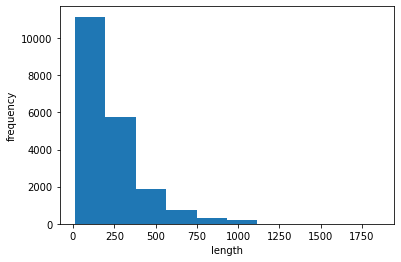

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths)) # 리뷰 평균 길이, 중간값

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen = 100) # 리뷰의 길이가 100이 되도록 자르거나 0으로 패딩
val_seq = pad_sequences(val_input, maxlen = 100)
print(train_seq.shape)
print(train_seq[0])
print(train_input[0][-10:]) # 마지막 10개의 토큰을 확인 => 앞 부분이 잘렸군

(20000, 100)
[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]
[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


위의 코드에서도 확인할 수 있듯이 pad_sequences() 함수는 기본적으로 maxlen 보다 긴 시퀀스의 앞 부분을 자른다. 이 이유는 일반적으로 시퀀스의 뒷 부분의 정보가 더 유용할 것으로 기대하기 때문이다. (영화 리뷰 데이터를 생각해 보면 리뷰의 끝에 결정적인 소감을 말할 가능성이 높다.) 시퀀스의 뒷 부분을 잘라내고 싶다면 pad_sequences() 함수의 truncating 매개변수의 값을 기본값 'pre'가 아닌 'post'로 바꾸면 된다. 또한 패딩 0 값도 앞 부분에 추가된다.

In [ ]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100, 500))) # activation default is tanh
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

토큰을 정수로 변환한 데이터를 신경망에 주입하면 큰 정수가 큰 활성화 출력을 만든다. 따라서 정숫값에 있는 크기 속성을 없애고 각 정수를 고유하게 표현하는 원-핫 인코딩 방식을 사용해야 한다.

In [ ]:
train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)
print(np.sum(train_oh[0][0])) # 모든 원소의 값이 1이 되는지 확인

model.summary()

1.0
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 8)                 4072      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
313/313 [==============================] - 14s 42ms/step - loss: 0.7008 - accuracy: 0.5002 - val_loss: 0.7013 - val_accuracy: 0.4922
Epoch 2/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6964 - accuracy: 0.5106 - val_loss: 0.6977 - val_accuracy: 0.5002
Epoch 3/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6934 - accuracy: 0.5197 - val_loss: 0.6951 - val_accuracy: 0.5078
Epoch 4/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6906 - accuracy: 0.5289 - val_loss: 0.6922 - val_accuracy: 0.5192
Epoch 5/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6865 - accuracy: 0.5489 - val_loss: 0.6863 - val_accuracy: 0.5510
Epoch 6/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6789 - accuracy: 0.5786 - val_loss: 0.6782 - val_accuracy: 0.5848
Epoch 7/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6689 - accuracy: 0.6083 - val_loss: 0.6692 - val_ac

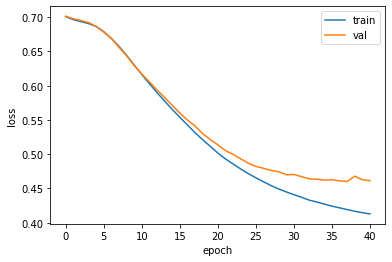

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplearn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model.fit(train_oh, train_target, epochs = 100, batch_size = 64, validation_data = (val_oh, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

훈련이 41 번째 에포크에서 조기 종료 되었다. 검증세트에 대한 정확도는 약 80% 이다. 훈련 손실은 꾸준히 감소하지만, 검증 손실은 대략 25번째 에포크에서 감소가 둔해지고 있다. 작업을 위해 입력 데이터를 원-핫 인코딩으로 변환하면서 입력 데이터가 엄청 커졌다. 훈련 데이터가 커질수록 문제가 될 수 있으므로 다른 방법을 사용해보자.

순환 신경망에서 텍스트 척리시 즐겨 사용하는 방법은 **단어 임베딩(Word Embedding)**이다. 단어 임베딩은 각 단어를 고정된 크기의 실수 벡터로 바꾸어준다. 단어 임베딩은 입력으로 정수 데이터를 받기 때문에 train_oh 배열이 아니라 train_seq를 사용할 수 있어서 효율적인 메모리 사용이 가능하다.

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100)) # 어휘 사전의 크기, 임베딩 벡터의 크기, 입력 시퀀스의 길이
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
313/313 [==============================] - 8s 23ms/step - loss: 0.6938 - accuracy: 0.5074 - val_loss: 0.6936 - val_accuracy: 0.5062
Epoch 2/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6899 - accuracy: 0.5351 - val_loss: 0.6923 - val_accuracy: 0.5240
Epoch 3/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6871 - accuracy: 0.5518 - val_loss: 0.6914 - val_accuracy: 0.5272
Epoch 4/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6843 - accuracy: 0.5618 - val_loss: 0.6912 - val_accuracy: 0.5238
Epoch 5/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6814 - accuracy: 0.5731 - val_loss: 0.6908 - val_accuracy: 0.5286
Epoch 6/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6785 - accuracy: 0.5800 - val_loss: 0.6908 - val_accuracy: 0.5310
Epoch 7/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6756 - accuracy: 0.5863 - val_loss: 0.6906 - val_accuracy:

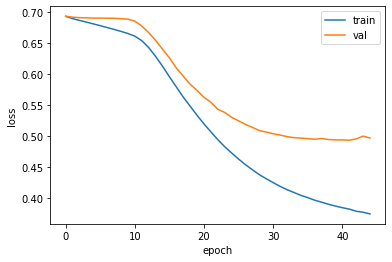

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplearn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

#3. LSTM과 GRU

SimpleRNN 보다 고급 순환층인 LSTM과 GRU가 있다. 시퀀스가 길수록 순환되는 은닉 상태에 담긴 정보가 점차 희석되기 때문에 단기 기억을 오래 기억하기 위한 Long Short Term Memory(LSTM)가 고안되었다.

1. LSTM 에서는 순환되는 상태가 2개이다. 은닉 상태와는 달리 다음 층으로 전달되지 않고 LSTM 셀에서 순환만 되는 **셀 상태(Cell State)**라고 불리는 값이 있다. LSTM 에는 셀 상태에 있는 정보를 제거하는 **삭제 게이트**, 새로운 정보를 셀 상태에 추가하는 **입력 게이트**, 셀 상태가 다음 은닉 상태로 출력되는 **출력 게이트**가 존재한다.
2. GRU는 Gated Recurrent Unit의 약자이다. 이 셀은 LSTM을 간소화한 버전으로 생각할 수 있다. GRU 셀은 LSTM 보다 가중치가 적기 때문에 계산량이 적지만 LSTM 못지 않은 성능을 낸다.

#LSTM 신경망 훈련하기

In [2]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

train_seq = pad_sequences(train_input, maxlen = 100)
val_seq = pad_sequences(val_input, maxlen = 100)

model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length = 100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.summary()

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


SimpleRNN 클래스의 모델 파라미터 개수는 200개였던 반면, LSTM 셀에는 작은 셀이 4개 있어서 모델 파라미터의 개수가 800개가 되었다.

In [3]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 13s 35ms/step - loss: 0.6923 - accuracy: 0.5458 - val_loss: 0.6912 - val_accuracy: 0.5904
Epoch 2/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6894 - accuracy: 0.6159 - val_loss: 0.6870 - val_accuracy: 0.6424
Epoch 3/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6815 - accuracy: 0.6590 - val_loss: 0.6724 - val_accuracy: 0.6840
Epoch 4/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6334 - accuracy: 0.7032 - val_loss: 0.6012 - val_accuracy: 0.7018
Epoch 5/100
313/313 [==============================] - 10s 33ms/step - loss: 0.5806 - accuracy: 0.7244 - val_loss: 0.5725 - val_accuracy: 0.7246
Epoch 6/100
313/313 [==============================] - 10s 33ms/step - loss: 0.5563 - accuracy: 0.7442 - val_loss: 0.5528 - val_accuracy: 0.7414
Epoch 7/100
313/313 [==============================] - 11s 34ms/step - loss: 0.5377 - accuracy: 0.7574 - val_loss: 0.5364 - val_ac

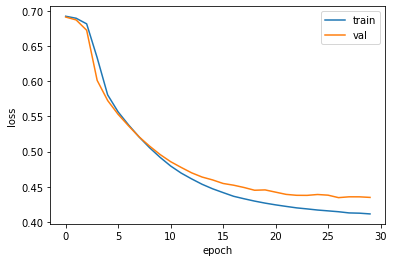

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

#순환층에 드롭아웃 적용하기
---
완전 연결 신경망과 합성곱 신경망에서는 Dropout 클래스를 사용해 드롭아웃을 적용했다. 이를 통해 모델이 훈련 세트에 너무 과대적학되는 것을 막았다. SimpleRNN과 LSTM 클래스 모두 자체적으로 드롭아웃 기능을 제공한다. dropout 매개변수는 셀의 입력에 드롭아웃을 적용하고 recurrent_dropout 매개변수는 순환되는 은닉 상태에 드롭아웃을 적용한다.

In [8]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.LSTM(8, dropout = 0.3)) # dropout 적용
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 13s 37ms/step - loss: 0.6929 - accuracy: 0.5130 - val_loss: 0.6926 - val_accuracy: 0.5246
Epoch 2/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6916 - accuracy: 0.5551 - val_loss: 0.6912 - val_accuracy: 0.5620
Epoch 3/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6896 - accuracy: 0.5890 - val_loss: 0.6887 - val_accuracy: 0.5878
Epoch 4/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6853 - accuracy: 0.6143 - val_loss: 0.6826 - val_accuracy: 0.6096
Epoch 5/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6677 - accuracy: 0.6207 - val_loss: 0.6445 - val_accuracy: 0.6686
Epoch 6/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6154 - accuracy: 0.7210 - val_loss: 0.6034 - val_accuracy: 0.7304
Epoch 7/100
313/313 [==============================] - 11s 35ms/step - loss: 0.5930 - accuracy: 0.7321 - val_loss: 0.5858 - val_ac

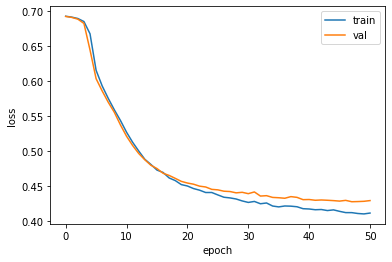

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show() # 훈련 손실과 검증 손실 간의 차이가 좁혀진 것을 확인할 수 있다.

#2개의 층을 연결하기
---
밀집층이나 합성곱 층처럼 순환층도 여러 개를 쌓을 수 있다. 순환층을 연결할 때는 주의할 점이 있다. 순환층의 은닉 상태는 샘플의 마지막 타임스텝에 대한 은닉 상태만 다음 상태로 전달한다. 하지만 순환층을 쌓게 되면 모든 순환층에 순차 데이터가 필요하다. 따라서 앞쪽의 순환층이 모든 타임스텝에 대한 은닉 상태를 출력하고 마지막 순환층만 마지막 타임스텝의 은닉 상태를 출력해야 한다.

In [10]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length = 100))
model3.add(keras.layers.LSTM(8, dropout = 0.3, return_sequences = True))
model3.add(keras.layers.LSTM(8, dropout = 0.3))
model3.add(keras.layers.Dense(1, activation = 'sigmoid'))

model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_5 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [11]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model3.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 25s 69ms/step - loss: 0.6928 - accuracy: 0.5226 - val_loss: 0.6923 - val_accuracy: 0.5172
Epoch 2/100
313/313 [==============================] - 20s 65ms/step - loss: 0.6907 - accuracy: 0.5610 - val_loss: 0.6881 - val_accuracy: 0.6398
Epoch 3/100
313/313 [==============================] - 21s 66ms/step - loss: 0.6755 - accuracy: 0.6437 - val_loss: 0.6466 - val_accuracy: 0.7020
Epoch 4/100
313/313 [==============================] - 21s 66ms/step - loss: 0.6070 - accuracy: 0.7103 - val_loss: 0.5809 - val_accuracy: 0.7246
Epoch 5/100
313/313 [==============================] - 20s 65ms/step - loss: 0.5704 - accuracy: 0.7267 - val_loss: 0.5498 - val_accuracy: 0.7374
Epoch 6/100
313/313 [==============================] - 21s 67ms/step - loss: 0.5416 - accuracy: 0.7416 - val_loss: 0.5264 - val_accuracy: 0.7548
Epoch 7/100
313/313 [==============================] - 21s 66ms/step - loss: 0.5203 - accuracy: 0.7547 - val_loss: 0.5073 - val_ac

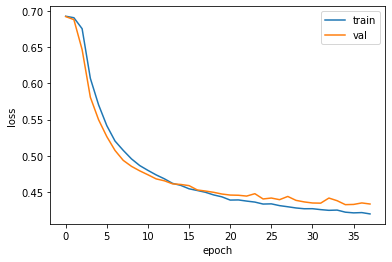

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show() # 과대 적합을 제어하면서 손실을 최대한 낮춘 것을 확인할 수 있다.

#GRU 신경망 훈련하기

In [13]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length = 100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation = 'sigmoid'))

model4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [15]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model4.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model4.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 38ms/step - loss: 0.6928 - accuracy: 0.5254 - val_loss: 0.6923 - val_accuracy: 0.5496
Epoch 2/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6918 - accuracy: 0.5576 - val_loss: 0.6912 - val_accuracy: 0.5702
Epoch 3/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6903 - accuracy: 0.5824 - val_loss: 0.6895 - val_accuracy: 0.5896
Epoch 4/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6876 - accuracy: 0.5996 - val_loss: 0.6864 - val_accuracy: 0.6026
Epoch 5/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6832 - accuracy: 0.6122 - val_loss: 0.6813 - val_accuracy: 0.6136
Epoch 6/100
313/313 [==============================] - 11s 37ms/step - loss: 0.6762 - accuracy: 0.6293 - val_loss: 0.6733 - val_accuracy: 0.6196
Epoch 7/100
313/313 [==============================] - 11s 37ms/step - loss: 0.6653 - accuracy: 0.6380 - val_loss: 0.6612 - val_ac

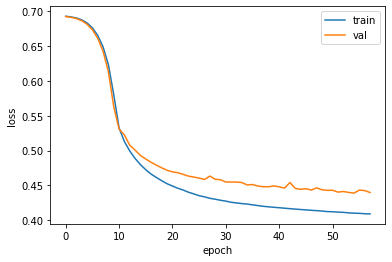

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()